# **Data Visualization Using Python**

---
### รายงานนี้เป็นส่วนหนึ่งของรายวิชา `DSI200 การเขียนโปรแกรมเพื่อวิเคราะห์ข้อมูล(Data Analytics Programming)`
### **Members**
```
1. พลพล       จันทรอาภา         6524650063
2. สิริชูพงษ์     จำปาศักดิ์          6524650097
3. ฤทธิ์ธิดา     ยิ่งนัยเกียรติ        6524651350
4. ลภัสรดา     ตรึกตรองกิจ        6524651376
```
---

## **การ Import Library ที่ใช้สร้าง Data Visualization**

In [ ]:
import requests                                                 #เป็น Python Library ที่ใช้สำหรับส่งคำขอข้อมูลไปยังหน้าเว็บไซต์
from bs4 import BeautifulSoup                                   #เรียกใช้ tool ชื่อ bs4 จาก BeautifulSoup ซึ่งเป็น Python Module ที่ใช้สำหรับดึงข้อมูลจากไฟล์ HTML มาทำงานร่วมกับ parser
import matplotlib.pyplot as plt                                 #เป็น Python Module ที่ใช้สำหรับสร้างกราฟ
import pandas as pd                                             #เป็น Python Library ที่ใช้สำหรับสร้างและจัดการ DataFrame
import seaborn as sns                                           #เป็น Python Library ที่ใช้สำหรับสร้างกราฟ


---



## **Web Scraping**

In [ ]:
main_url = 'https://sgulyano.github.io/eval/'                   #ตั้งตัวแปร main_url เพื่อเตรียมเรียกใช้งานเว็บไซต์
html_url = ['02226005.html',                                    #ตั้งตัวแปร html_url เพื่อเรียกใช้งานเว็บไซต์ย่อย
            '08846113.html',
            '19689783.html',
            '24363682.html',
            '24674969.html',
            '26742703.html',
            '33472214.html',
            '33561138.html',
            '33565025.html',
            '41557226.html',
            '43951333.html',
            '44868136.html',
            '45435188.html',
            '48033334.html',
            '51435303.html',
            '53231654.html',
            '60189297.html',
            '61116032.html',
            '66887754.html',
            '68346670.html',
            '71728345.html',
            '79550445.html',
            '83255004.html',
            '94026030.html',
            '95860997.html',
            '96905621.html']
eval_url = [main_url + url for url in html_url]                 #สำหรับเรียกใช้งานเว็บไซต์ทุกลิงก์

def get_table_data(item):                                       #สร้างฟังก์ชันเพื่อดึงข้อมูลจากตารางในเว็บไซต์
  data = []
  table_body = item.find('tbody')                               #สร้างตัวแปร tag : tbody
  rows = table_body.find_all('tr')                              #สร้างตัวแปร rows ให้เก็บข้อมูลแต่ละแถวจะอยู่ใน tag : tr
  for row in rows:                                              #สร้าง for loop ให้ตัวแปร row loop ในตัวแปร rows
    cols = row.find_all('td')                                   #สร้างตัวแปร cols เก็บข้อมูลที่อยู่ใน tag : td
    cols = [ele.text.strip() for ele in cols]                   #ทำการนำข้อมูลที่เก็บมาได้จากตัวแปร cols มาแปลงให้อยู่ในรูปแบบตัวอักษรและตัดช่องว่างระหว่าง tag ทิ้ง
    data.append([ele for ele in cols if ele])                   #นำข้อมูล cols ที่ถูกแปลงแล้วมาเก็บไว้ใน list ที่ชื่อ data
  return data                                                   #คืนค่าตัวแปร data

all_info = []                                                   #สร้าง list ชื่อ all_info สำหรับเก็บข้อมูลหัวตารางจากทุกเว็บไซต์
all_ratings = []                                                #สร้าง list ชื่อ all_rating สำหรับเก็บข้อมูลตารางการประเมินจากทุกเว็บไซต์
for url in eval_url:                                            #สร้าง loop เรียกใช้แต่ละเว็บไซต์สำหรับเรียกหาข้อมูล
  r = requests.get(url)                                         #ใช้ฟังก์ชัน requests.get เพื่อดึงข้อมูลจากเว็บไซต์ และฝากค่าข้อมูลไว้ที่ตัวแปร r
  soup = BeautifulSoup(r.content, "html.parser")                #แปลงโครงสร้าง html ใน content เข้าตัวแปร soup
  tables = soup.find_all("table")                               #ใช้ฟังก์ชัน .find_all("table") เพื่อหา table ที่มีอยู่ใน soup ทั้งหมด จากนั้นฝากค่าไว้ที่ตัวแปร tables

  all_info.append(get_table_data(tables[0]))                    #เก็บบันทึกข้อมูลหัวตารางจากฟังก์ชัน get_table_data(tables[0]) มาอยู่ในลิสต์ all_info
  all_ratings.append(get_table_data(tables[2]))                 #เก็บบันทึกข้อมูลตารางการประเมินจากฟังก์ชัน get_table_data(tables[2]) มาอยู่ในลิสต์ all_ratings
all_data = (all_info, all_ratings)                              #สร้างตัวแปร all_data เพื่อนำข้อมูลจาก all_info และ all_rating มาเก็บรวมกัน

sub = []                                                        #สร้าง list ชื่อ sub สำหรับเก็บข้อมูลรายวิชา
sec = []                                                        #สร้าง list ชื่อ sec สำหรับเก็บข้อมูล section
sem = []                                                        #สร้าง list ชื่อ sem สำหรับเก็บข้อมูลภาคการศึกษา
students = []                                                   #สร้าง list ชื่อ students สำหรับเก็บข้อมูลจำนวนนักศึกษา
stu_ans = []                                                    #สร้าง list ชื่อ stu_ans สำหรับเก็บข้อมูลจำนวนนักศึกษาที่ตอบแบบประเมิน
for i in range(len(html_url)):                                  #สร้าง loop ตามจำนวนเว็บไซต์สำหรับดึงข้อมูลส่วนที่ต้องการจาก all_data ตามลำดับเว็บไซต์
  sub.append(all_data[0][i][0][1])                              #ดึงข้อมูลรายวิชาจาก all_data แล้วเพิ่มเข้าไปใน list sub ซึ่งเป็นการเจาะข้อมูลลึกลงไปตาม index
  sec.append(all_data[0][i][1][1])                              #ดึงข้อมูล Section จาก all_data แล้วเพิ่มเข้าไปใน list sec
  sem.append(all_data[0][i][2][1])                              #ดึงข้อมูล Semester จาก all_data แล้วเพิ่มเข้าไปใน list sem
  students.append(all_data[0][i][4][1])                         #ดึงข้อมูล Students จาก all_data แล้วเพิ่มเข้าไปใน list students
  stu_ans.append(all_data[0][i][5][1])                          #ดึงข้อมูล Students_ans จาก all_data แล้วเพิ่มเข้าไปใน list stu_ans

dat = {                                                         #สร้าง dictionary ชื่อ dat สำหรับเก็บข้อมูลในรูปของ Key:Value
    "Subjects" : (sub),                                         #ให้ Key เป็น Subjects      แล้ว Value เป็น sub
    "Section" : (sec),                                          #ให้ Key เป็น Section       แล้ว Value เป็น sec
    "Semester" : (sem),                                         #ให้ Key เป็น Semester      แล้ว Value เป็น sem
    "Students" : (students),                                    #ให้ Key เป็น Student       แล้ว Value เป็น students
    "Students_ans" : (stu_ans)                                  #ให้ Key เป็น Student_ans   แล้ว Value เป็น stu_ans
}

df = pd.DataFrame(dat)                                          #สร้าง DataFrame จาก dat และฝากค่าไว้ที่ตัวแปร df

term_list = []                                                  #สร้าง list ชื่อ term_list สำหรับเก็บข้อมูลเฉพาะภาคการศึกษา
year_list = []                                                  #สร้าง list ชื่อ year_list สำหรับเก็บข้อมูลเฉพาะปีการศึกษา
num_link = []                                                   #สร้าง list ชื่อ num_link สำหรับเก็บข้อมูลลำดับของเว็บไซต์
for col_idx,data in df['Semester'].iteritems():
    term_list.append(data[0])                                   #เก็บเฉพาะค่าของภาคการศึกษาเข้าลิสต์

for col_idx,data in df['Semester'].iteritems():
    year_list.append(data[2:])                                  #เก็บเฉพาะค่าปีการศึกษาเข้าลิสต์

for num in range(1,len(html_url)+1):                            #ให้ num ลูปตามจำนวนของ html_url โดยเริ่มที่ 1 ถึง
    num_link.append(num)                                        #เก็บค่า num เข้าลิสต์

df['Term'] = term_list                                          #สร้าง column ชื่อ Term ใน df และนำข้อมูลใน term_list เข้าไป
df['Year'] = year_list                                          #สร้าง column ชื่อ Year ใน df และนำข้อมูลใน year_list เข้าไป
df['link'] = num_link                                           #สร้าง column ชื่อ link ใน df และนำข้อมูลใน num_link เข้าไป

df

,Subjects,Section,Semester,Students,Students_ans,Term,Year,link
0,FGL497,231863,1/2562,43,6 (13.95%),1,2562,1
1,FGL497,728025,2/2563,45,10 (22.22%),2,2563,2
2,DRI970,231863,1/2563,43,29 (67.44%),1,2563,3
3,FGL497,231863,2/2562,50,5 (10.00%),2,2562,4
4,RMW014,556574,2/2562,511,210 (41.10%),2,2562,5
5,NYE553,231863,1/2564,46,15 (32.61%),1,2564,6
6,RMW014,556574,1/2562,501,94 (18.76%),1,2562,7
7,AZW892,231863,2/2564,46,33 (71.74%),2,2564,8
8,NVI781,231863,1/2564,64,35 (54.69%),1,2564,9
9,YRY790,231863,2/2561,44,7 (15.91%),2,2561,10




---



## **Function ที่ใช้สำหรับเก็บข้อมูลเข้า list เพื่อนำไปสร้างกราฟ**
> เนื่องจากข้อมูลที่ใช้ในการสร้างกราฟอิงจากภาคการศึกษาและ Section ของแต่ละเว็บไซต์ จึงสร้างฟังก์ชันมาทั้งหมด 5 ฟังก์ชัน
โดยแบ่งเป็นฟังก์ชันสำหรับสร้าง Stacked bar chart 2 ฟังก์ชัน และฟังก์ชันสำหรับสร้าง Pie chart 3 ฟังก์ชันตามจำนวนส่วนของข้อคำถามที่มี 3 ส่วน ดังนี้

> ### ฟังก์ชันสำหรับสร้าง Stacked bar chart

In [ ]:
# สร้างฟังก์ชันสำหรับเก็บข้อมูลที่ต้องการใช้ในการสร้างกราฟที่อิงจากภาคการศึกษา
sem_list = []                                                   #สร้าง list ชื่อ sem_list สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ลงทะเบียนเรียนในแต่ละเว็บไซต์ที่ต้องการ
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list สำหรับเก็บข้อมูลจำนวนนักศึกษาที่ตอบแบบประเมินในแต่ละเว็บไซต์ที่ต้องการ
def sem_bar_chart(df_n):                                        #สร้าง Function ชื่อ sem_bar_chart โดยมี argument คือ df_n คือ DataFrame ย่อยที่ดึงจากเว็บไวต์ที่ต้องการ
  for col_idx,data in df_n['Semester'].iteritems():             #สร้าง loop สำหรับเรียกดึง data จาก column ของ Semester ใน df ที่ n
    sem_list.append(data)                                       #เพิ่ม data ที่เป็นข้อมูลของ Semester ของเว็บไซต์ที่ต้องการใช้ เข้า sem_list
  for col_idx,data in df_n['Students'].iteritems():             #สร้าง loop สำหรับเรียกดึง data จาก column ของ Students ใน df ที่ n
    students_list.append(int(data))                             #เพิ่ม data ที่เป็นข้อมูลของ Students ของเว็บไซต์ที่ต้องการใช้ เข้า students_list
  for col_idx,data in df_n['Students_ans'].iteritems():         #สร้าง loop สำหรับเรียกดึง data จาก column ของ Students_ans ใน df ที่ n
    data_list = data.split()                                    #เนื่องจากข้อมูลของ Students_ans มีทั้งข้อมูลตัวเลขและเปอร์เซนต์ จึงใช้ฟังก์ชัน spilt เพื่อแยกออกจากกันแล้วเก็บไว้ใน data_list
    stu_ans_list.append(int(data_list[0]))                      #เพิ่ม data ที่เป็นข้อมูลใน data_list โดยเลือกเก็บแค่ index ที่ 0 ซึ่งเป็นข้อมูลตัวเลขของนักศึกษาที่ตอบแบบประเมินของเว็บไซต์ที่ต้องการใช้ เข้า stu_ans_list

In [ ]:
# สร้างฟังก์ชันสำหรับเก็บค่าข้อมูลที่ใช้ในการสร้างกราฟโดยอิงจาก Section
sec_list = []                                                   #สร้าง list ชื่อ sec_list สำหรับเก็บข้อมูลของ Section
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ลงทะเบียนเรียนในแต่ละเว็บไซต์ที่ต้องการ
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list สำหรับเก็บข้อมูลจำนวนนักศึกษาที่ตอบแบบประเมินในแต่ละเว็บไซต์ที่ต้องการ
def sec_bar_chart(df_n):                                        #สร้าง Function ชื่อ sec_bar_chart โดยมี argument คือ df_n คือ DataFrame ย่อยที่ดึงจากเว็บไวต์ที่ต้องการ
  for col_idx,data in df_n['Section'].iteritems():              #สร้าง for loop สำหรับเรียกดึง data จาก column ของ Section ใน df ที่ n
    sec_list.append(data)                                       #เพิ่ม data ที่เป็นข้อมูลของ Section ของเว็บไซต์ที่ต้องการใช้ เข้า sec_list
  for col_idx,data in df_n['Students'].iteritems():             #สร้าง for loop สำหรับเรียกดึง data จาก column ของ Students ใน df ที่ n
    students_list.append(int(data))                             #เพิ่ม data ที่เป็นข้อมูลของ Students ของเว็บไซต์ที่ต้องการใช้ เข้า students_list
  for col_idx,data in df_n['Students_ans'].iteritems():         #สร้าง for loop สำหรับเรียกดึง data จาก column ของ Students_ans ใน df ที่ n
    data_list = data.split()                                    #เนื่องจากข้อมูลของ Students_ans มีทั้งข้อมูลตัวเลขและเปอร์เซนต์ จึงใช้ฟังก์ชัน spilt เพื่อแยกออกจากกันแล้วเก็บไว้ใน data_list
    stu_ans_list.append(int(data_list[0]))                      #เพิ่ม data ที่เป็นข้อมูลใน data_list โดยเลือกเก็บแค่ index ที่ 0 ซึ่งเป็นข้อมูลตัวเลขของนักศึกษาที่ตอบแบบประเมินของเว็บไซต์ที่ต้องการใช้ เข้า stu_ans_list

> ### ฟังก์ชันสำหรับสร้าง Pie chart

In [ ]:
# สร้างฟังก์ชันในการดึงข้อมูลการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย มาเก็บในลิสต์สำหรับสร้าง Pie chart
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
def pie_chart_rating_part1(link):                               #สร้าง Function ชื่อ pie_chart_rating_part1 โดยมี argument คือ link คือ DataFrame ย่อยที่ดึงจากเว็บไซต์ที่ต้องการ
  for x in range(1,7):                                          #สร้าง for loop สำหรับเรียกดึงข้อมูลร้อยละของระดับการประเมิน
    percent = all_data[1][link-1][12][x*2]                      #ดึงข้อมูลจาก all data ในส่วนที่เป็นร้อยละของการประเมินในส่วนที่ 1 ตามเว็บไซต์ที่ต้องการ ซึ่งข้อมูลร้อยละของแต่ละระดับห่างกันอยู่ 2 ช่อง จึงใช้ index ที่ x*2
    if percent != '.00':                                        #กำหนดเงื่อนไขว่า หากร้อยละ ไม่เท่ากับ .00 แล้ว
      list_part1.append(percent)                                #ให้เก็บข้อมูลร้อยละเข้าลิสต์

  mylabels = ['level 5','level 4','level 3','level 2',          #สร้าง list ชื่อ mylabels เพื่อเก็บข้อมูลของระดับการประเมินทั้งหมด
              'level 1','level 0']
  for i in range(len(list_part1)):                              #สร้าง for loop ตาม range ของจำนวนข้อมูลของร้อยละที่มี(มีค่ามากกว่า .00)
    label = mylabels[i]                                         #สร้างตัวแปร label เก็บค่าข้อมูลของร้อยละ แล้วลูป i ตามจำนวนข้อมูลของร้อยละ
    new_labels.append(label)                                    #เพิ่ม label ซึ่งเป็นข้อมูลของระดับการประเมินที่มีนักเรียนเลือกเก็บเข้าลิสต์

In [ ]:
# สร้างฟังก์ชันในการดึงข้อมูลการประเมินในส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน มาเก็บในลิสต์สำหรับสร้าง Pie chart
list_part2 = []                                                 #สร้าง list ชื่อ list_part2 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 2
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
def pie_chart_rating_part2(link):                               #สร้าง Function ชื่อ pie_chart_rating_part2 โดยมี argument คือ link คือ DataFrame ย่อยที่ดึงจากเว็บไซต์ที่ต้องการ
  for x in range(1,7):                                          #สร้าง for loop สำหรับเรียกดึงข้อมูลร้อยละของระดับการประเมิน
    percent = all_data[1][link-1][23][x*2]                      #ดึงข้อมูลจาก all data ในส่วนที่เป็นร้อยละของการประเมินในส่วนที่ 2 ตามเว็บไซต์ที่ต้องการ ซึ่งข้อมูลร้อยละของแต่ละระดับห่างกันอยู่ 2 ช่อง จึงใช้ index ที่ x*2
    if percent != '.00':                                        #กำหนดเงื่อนไขว่า หากร้อยละ ไม่เท่ากับ .00 แล้ว
      list_part2.append(percent)                                #ให้เก็บข้อมูลร้อยละเข้าลิสต์

  mylabels = ['level 5','level 4','level 3','level 2',          #สร้าง list ชื่อ mylabels เพื่อเก็บข้อมูลของระดับการประเมินทั้งหมด
              'level 1','level 0']
  for i in range(len(list_part2)):                              #สร้าง for loop ตาม range ของจำนวนข้อมูลของร้อยละที่มี(มีค่ามากกว่า .00)
    label = mylabels[i]                                         #สร้างตัวแปร label เก็บค่าข้อมูลของร้อยละ แล้วลูป i ตามจำนวนข้อมูลของร้อยละ
    new_labels.append(label)                                    #เพิ่ม label ซึ่งเป็นข้อมูลของระดับการประเมินที่มีนักเรียนเลือกเก็บเข้าลิสต์

In [ ]:
# สร้างฟังก์ชันในการดึงข้อมูลการประเมินในส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ มาเก็บในลิสต์สำหรับสร้าง Pie chart
list_part3 = []                                                 #สร้าง list ชื่อ list_part3 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 3
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
def pie_chart_rating_part3(link):                               #สร้าง Function ชื่อ pie_chart_rating_part3 โดยมี argument คือ link คือ DataFrame ย่อยที่ดึงจากเว็บไซต์ที่ต้องการ
  for x in range(1,7):                                          #สร้าง for loop สำหรับเรียกดึงข้อมูลร้อยละของระดับการประเมิน
    percent = all_data[1][link-1][19][x*2]                      #ดึงข้อมูลจาก all data ในส่วนที่เป็นร้อยละของการประเมินในส่วนที่ 3 ตามเว็บไซต์ที่ต้องการ ซึ่งข้อมูลร้อยละของแต่ละระดับห่างกันอยู่ 2 ช่อง จึงใช้ index ที่ x*2
    if percent != '.00':                                        #กำหนดเงื่อนไขว่า หากร้อยละ ไม่เท่ากับ .00 แล้ว
      list_part3.append(percent)                                #ให้เก็บข้อมูลร้อยละเข้าลิสต์

  mylabels = ['level 5','level 4','level 3','level 2',          #สร้าง list ชื่อ mylabels เพื่อเก็บข้อมูลของระดับการประเมินทั้งหมด
              'level 1','level 0']
  for i in range(len(list_part3)):                              #สร้าง for loop ตาม range ของจำนวนข้อมูลของร้อยละที่มี(มีค่ามากกว่า .00)
    label = mylabels[i]                                         #สร้างตัวแปร label เก็บค่าข้อมูลของร้อยละ แล้วลูป i ตามจำนวนข้อมูลของร้อยละ
    new_labels.append(label)                                    #เพิ่ม label ซึ่งเป็นข้อมูลของระดับการประเมินที่มีนักเรียนเลือกเก็บเข้าลิสต์

## **SEC231863**
> เนื่องจากพบว่าในแต่ละเว็บไซต์มีข้อมูลของ SEC231863 เป็นส่วนใหญ่ จึงนำข้อมูลของ SEC231863 ด้านต่าง ๆ มาสร้างกราฟ

> ### จำนวนรายวิชาที่นักศึกษา SEC231863 เรียนในแต่ละภาคการศึกษาของแต่ละปีการศึกษา


In [ ]:
# สร้าง DataFrame ของข้อมูลจำนวนวิชาที่นักศึกษา SEC231863 เรียนในแต่ละภาคการศึกษา
sec_dat = df[df['Section'] == '231863']                         #สร้างตัวแปร sec_dat เพื่อดึงข้อมูลจาก DataFrame โดยดึงข้อมูลเฉพาะส่วนที่ต้องการ คือ SEC231863
sec_dat = sec_dat.groupby('Semester')['Subjects'].count()       #ใช้ฟังก์ชัน groupby เพื่อจัดกลุ่ม Semester ที่เหมือนกัน และใช้ฟังก์ชัน count เพื่อนับจำนวน Semester ที่เหมือนกันของ SEC231863

t_list = [1,1,1,2,2,2,2]                                        #สร้าง list ชื่อ t_list เพื่อเก็บข้อมูลของภาคการศึกษาแบบไม่ซ้ำปีการศึกษาของ SEC231863
y_list = [2562,2563,2564,2561,2562,2563,2564]                   #สร้าง list ชื่อ y_list เพื่อเก็บข้อมูลของปีการศึกษาแบบไม่ซ้ำภาคการศึกษาของ SEC231863
count_list = []                                                 #สร้าง list ชื่อ count_list เพื่อเก็บข้อมูลจำนวนรายวิชาที่ SEC231863 เรียนในแต่ละภาคและปีการศึกษา
for count in sec_dat:                                           #สร้าง loop สำหรับเก็บจำนวนรายวิชาจาก sec_dat เข้า list
  count_list.append(count)                                      #เพิ่มค่าจำนวนรายวิชาเข้า list

new_df = pd.DataFrame({'Term' : t_list,                         #สร้าง DataFrame สำหรับเรีียกดูข้อมูลที่ได้
                       'Year' : y_list,
                       'Number of Subjects' : count_list
                      })
new_df

,Term,Year,Number of Subjects
0,1,2562,2
1,1,2563,2
2,1,2564,5
3,2,2561,2
4,2,2562,1
5,2,2563,3
6,2,2564,2


>  Bar chart แสดงจำนวนรายวิชาที่นักศึกษา SEC231863 เรียนในแต่ละภาคการศึกษาของแต่ละปีการศึกษา

[Text(0.5, 1.0, 'Number of Subjects of SEC231863 in Every Semester')]

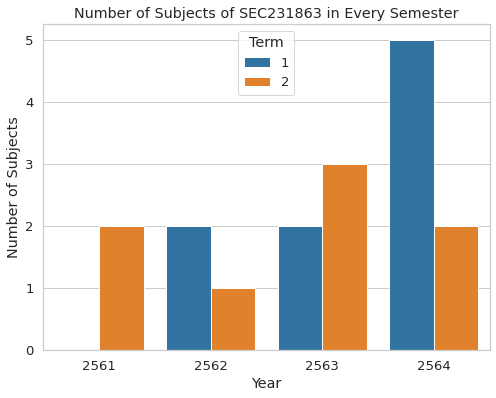

In [ ]:
# นำข้อมูลจำนวนวิชาที่นักศึกษา SEC231863 เรียนในแต่ละภาคการศึกษามาสร้าง Bar chart โดยใช้ Seaborn Library
plt.figure(figsize=(8,6))                                       #กำหนด size ของกราฟ
sns.set_style('whitegrid')                                      #สร้างรูปแบบเส้นกริดในกราฟ
sns.set_context('notebook', font_scale = 1.2)                   #กำหนดขนาด font ในกราฟ
bar_chart = sns.barplot(x= 'Year', y= 'Number of Subjects',     #ใช้ฟังก์ชัน barplot ของ seaborn เพื่อสร้างกราฟโดยกำหนดข้อมูลแกน x แกน y ข้อมูลที่ใช้ในตาราง และคำอธิบายกราฟ แล้วเก็บค่าไว้ในตัวแปร bar_chart
                        data = new_df, hue= 'Term')
bar_chart.set(title =
'Number of Subjects of SEC231863 in Every Semester')            #กำหนดหัวข้อของกราฟ

> ### การประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย ของนักศึกษา SEC231863 ที่ลงทะเบียนเรียนวิชา FGL497 ในช่วง COVID-19
> พบว่านักศึกษา SEC231863 ลงทะเบียนเรียนวิชา FGL497 ในช่วง Covid-19 ในภาคการศึกษาที่ 2 ของปีการศึกษา 2562, 2563 และ 2564

> Stacked bar chart แสดงการเปรียบเทียบของจำนวนนักศึกษาของ SEC231863 ในรายวิชา FGL497 ที่ตอบและไม่ตอบแบบประเมินในภาคการศึกษาที่ 2 ของปีการศึกษา 2562, 2563 และ 2564 ในช่วง Covid-19

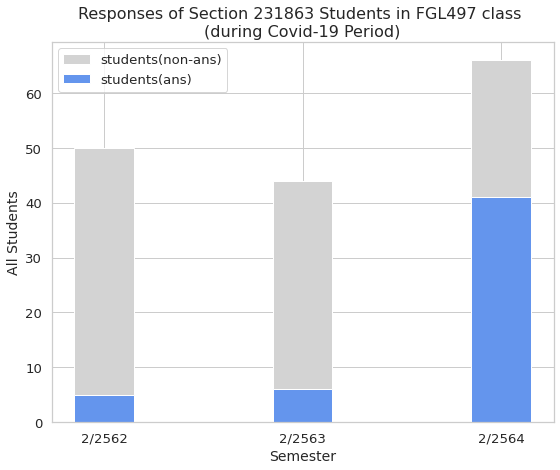

In [ ]:
# ดึงข้อมูลจาก DataFrame โดยการเลือก link ที่ต้องการ
df1 = df[(df['link'] == 4) | (df['link'] == 12) | (df['link'] == 22)]

sem_list = []                                                   #สร้าง list ชื่อ sem_list      สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดในแต่ละ classroom
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list  สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ตอบแบบประเมินในแต่ละ classroom
sem_bar_chart(df1)                                              #ใช้ฟังก์ชัน sem_bar_chart เพื่อเก็บข้อมูลของ df1

x_labels = sem_list                                             #ฝากค่า sem_list      ไว้ที่ตัวแปร x_labels
all_stu = students_list                                         #ฝากค่า students_list ไว้ที่ตัวแปร all_stu
stu_ans = stu_ans_list                                          #ฝากค่า stu_ans_list  ไว้ที่ตัวแปร stu_ans
stu_non_ans = []                                                #สร้าง list ชื่อ stu_non_ans   สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ไม่ได้ตอบแบบประเมินในแต่ละ classroom
for i in range(len(all_stu)):                                   #ลูป i ตามจำนวนนักเรียนทั้งหมด
  difference = all_stu[i] - stu_ans[i]                          #ให้ข้อมูลใน list all_stu กับ stu_ans ใน index เดียวกันที่ i มาลบกัน และฝากค่าไว้ที่ตัวแปร
  stu_non_ans.append(difference)                                #เพิ่มข้อมูล difference เข้าลิสต์ stu_non_ans

width = 0.3                                                     #กำหนดขนาดความกว้างของ bar

fig, ax = plt.subplots()                                        #ใช้ฟังก์ชัน subplots เพื่อสร้างกราฟ
fig.set_size_inches(9, 7)                                       #กำหนดขนาดของขอบเขตกราฟ

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาดแท่ง สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
ax.bar(x_labels, stu_non_ans, width, color='lightgrey',
       bottom=stu_ans, label='students(non-ans)')
ax.bar(x_labels, stu_ans, width, color='cornflowerblue',
       label='students(ans)')

#กำหนดหัวข้อกราฟ ชื่อแกน x และ แกน y รวมถึงขนาดตัวอักษร
ax.set_title('Responses of Section 231863 Students in FGL497 class \n(during Covid-19 Period)', fontsize = 16) #กำหนดชื่อกราฟ
ax.set_ylabel('All Students', fontsize= 14)                                                                    #กำหนดชื่อแกน y และกำหนดขนาด font
ax.set_xlabel('Semester', fontsize = 14)                                                                       #กำหนดชื่อแกน x และกำหนดขนาด font

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
ax.legend()
plt.show()

> สรุป: SEC231863 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2562 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 50 คน และตอบแบบประเมิน 5 คน ในภาคการศึกษาที่ 2/2563 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 44 คน และตอบแบบประเมิน 6 คน และในภาคการศึกษาที่ 2/2564 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 66 คน และตอบแบบประเมิน 41 คน

> Pie chart แสดงร้อยละของระดับการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย เกี่ยวกับการเรียนการสอนในช่วง COVID-19 ของ SEC231863 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2 ของปีการศึกษา 2562, 2563 และ 2564

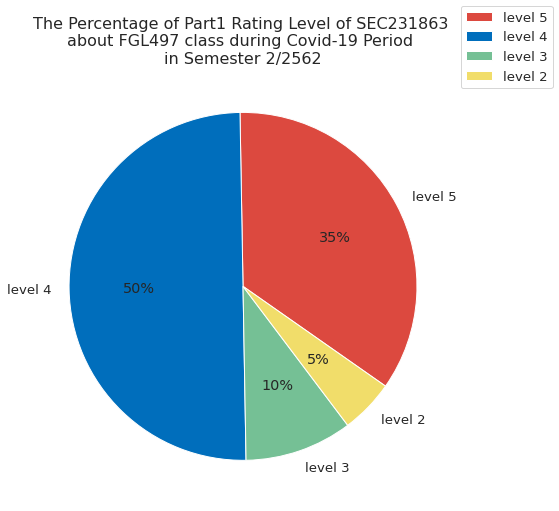

In [ ]:
# สร้าง pie chart แสดงข้อมูลการประเมินส่วนที่ 1 ของ SEC231863 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2562
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(4)                                       #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 4

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.0f%%', colors = pie_colors, startangle = 325)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2562', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

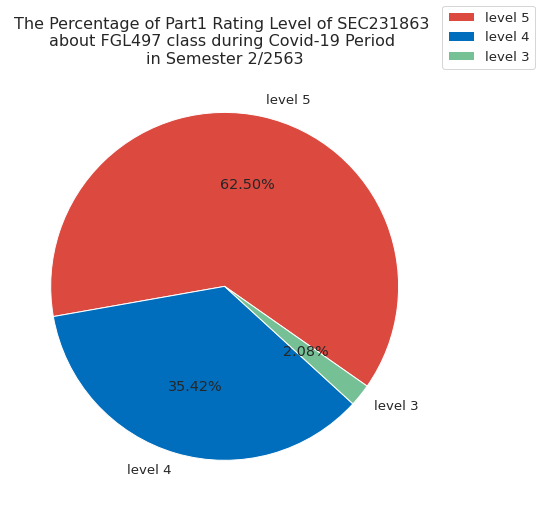

In [ ]:
# สร้าง pie chart แสดงข้อมูลการประเมินส่วนที่ 1 ของ SEC231863 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2563
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(12)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 12

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 325)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

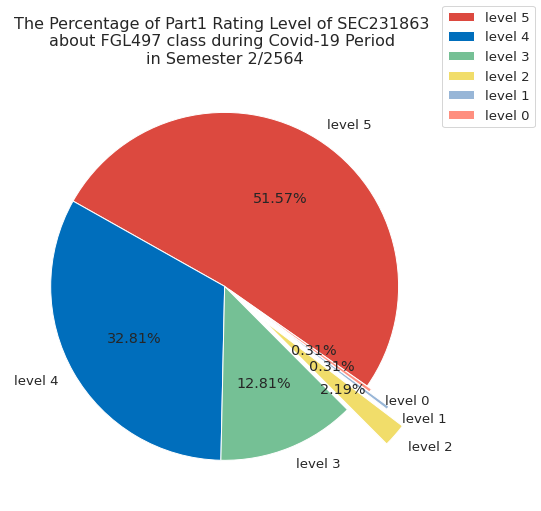

In [ ]:
# สร้าง pie chart แสดงข้อมูลการประเมินส่วนที่ 1 ของ SEC231863 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2564
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(22)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 22

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 325, explode = [0,0,0,0.3,0.17,0.03])

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2564', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

> สรุป: จะเห็นได้ว่าการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย ของนักศึกษา SEC231863 ที่ลงทะเบียนเรียนวิชา FGL497 ในช่วง Covid-19 ในภาคการศึกษาที่ 2 ของปีการศึกษา 2562, 2563 และ 2564 ประเมินในระดับที่ 4 และระดับที่ 5 เป็นส่วนใหญ่ จากนักศึกษาทั้งหมดที่ตอบแบบประเมินทั้งหมด ดังนั้นผู้สอนยังคงรักษาระดับคุณภาพการสอนได้

> ### การประเมินส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย ของนักศึกษา SEC231863 ที่ลงทะเบียนเรียนวิชา YRY790 ในช่วงเรียนปกติ
> พบว่านักศึกษา SEC231863 ลงทะเบียนเรียนวิชา YRY790 ในช่วงเรียนปกติ ในภาคการศึกษาที่ 2/2561 และ 1/2562

> Stacked bar chart แสดงการเปรียบเทียบของจำนวนนักศึกษาของ SEC231863 ในรายวิชา YRY790 ที่ตอบและไม่ตอบแบบประเมินในแต่ละภาคการศึกษาในช่วงเรียนปกติ ในภาคการศึกษาที่ 2/2561 และ 1/2562

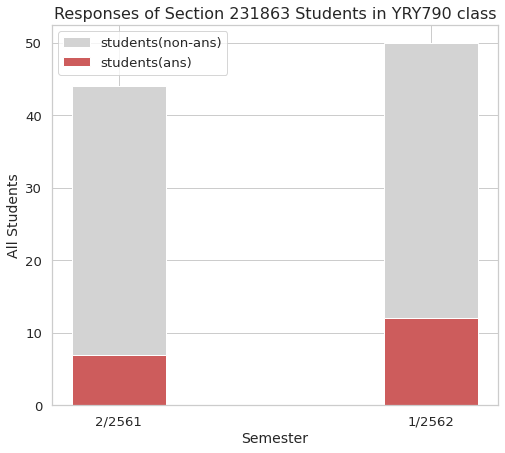

In [ ]:
# ดึงข้อมูลจาก DataFrame โดยการเลือก link ที่ต้องการ
df2 = df[(df['link'] == 10) | (df['link'] == 14)]

sem_list = []                                                   #สร้าง list ชื่อ sem_list      สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดในแต่ละ classroom
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list  สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ตอบแบบประเมินในแต่ละ classroom
sem_bar_chart(df2)                                              #ใช้ฟังก์ชัน sem_bar_chart เพื่อเก็บข้อมูลของ df2

x_labels = sem_list                                             #ฝากค่า sem_list      ไว้ที่ตัวแปร x_labels
all_stu = students_list                                         #ฝากค่า students_list ไว้ที่ตัวแปร all_stu
stu_ans = stu_ans_list                                          #ฝากค่า stu_ans_list  ไว้ที่ตัวแปร stu_ans
stu_non_ans = []                                                #สร้าง list ชื่อ stu_non_ans   สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ไม่ได้ตอบแบบประเมินในแต่ละ classroom
for i in range(len(all_stu)):                                   #ลูป i ตามจำนวนนักเรียนทั้งหมด
  difference = all_stu[i] - stu_ans[i]                          #ให้ข้อมูลใน list all_stu กับ stu_ans ใน index เดียวกันที่ i มาลบกัน และฝากค่าไว้ที่ตัวแปร
  stu_non_ans.append(difference)                                #เพิ่มข้อมูล difference เข้าลิสต์ stu_non_ans

width = 0.3                                                     #กำหนดขนาดความกว้างของ bar

fig, ax = plt.subplots()                                        #ใช้ฟังก์ชัน subplots เพื่อสร้างกราฟ
fig.set_size_inches(8, 7)                                       #กำหนดขนาดของขอบเขตกราฟ

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาดแท่ง สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
ax.bar(x_labels, stu_non_ans, width, color='lightgrey', bottom=stu_ans, label='students(non-ans)')
ax.bar(x_labels, stu_ans, width, color='indianred', label='students(ans)')

#กำหนดหัวข้อกราฟ ชื่อแกน x และ แกน y รวมถึงขนาดตัวอักษร
ax.set_title('Responses of Section 231863 Students in YRY790 class', fontsize = 16)
ax.set_ylabel('All Students', fontsize= 14)
ax.set_xlabel('Semester', fontsize = 14)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
ax.legend()
plt.show()

> สรุป: SEC231863 ในรายวิชา YRY790 ในภาคการศึกษาที่ 2/2561 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 44 คน และตอบแบบประเมิน 7 คน และในภาคการศึกษาที่ 1/2562 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 50 คน และตอบแบบประเมิน 12 คน

> Pie chart แสดงร้อยละของระดับการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย เกี่ยวกับการเรียนการสอนในช่วงปกติของ SEC231863 ในรายวิชา YRY790 ในภาคการศึกษาที่ 2/2561 และ 1/2562

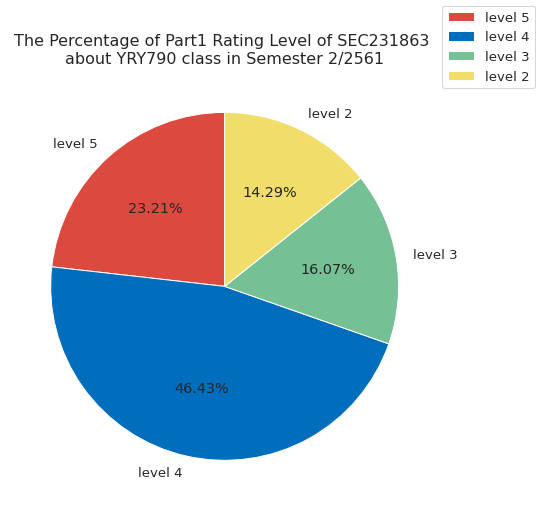

In [ ]:
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(10)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 10

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 90)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout YRY790 class in Semester 2/2561', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

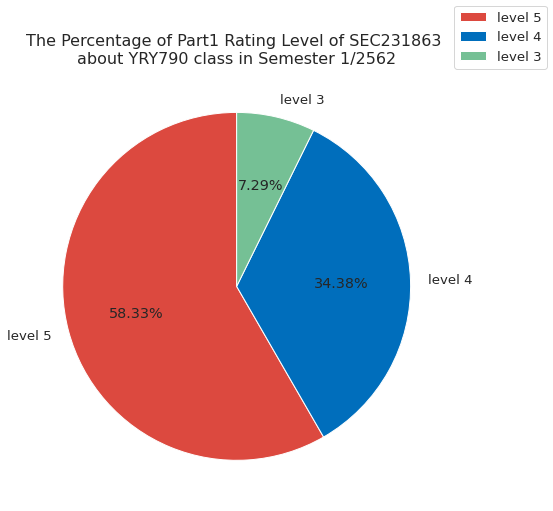

In [ ]:
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(14)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 14

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 90)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout YRY790 class in Semester 1/2562', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

> สรุป: จะเห็นได้ว่า SEC231863 ในรายวิชา YRY790 ในภาคการศึกษาที่ 2/2561 และ 1/2562 มีนักศึกษาที่ประเมินในระดับที่ 4 และระดับที่ 5 เป็นส่วนใหญ่ จากนักศึกษาทั้งหมดที่ตอบแบบประเมินทั้งหมด ดังนั้นผู้สอนยังคงรักษาระดับคุณภาพการสอนได้



---



## **Subject: DRI970 in Semester 1/2563**

> ### การประเมินในส่วนที่ 2 คำถามของคณะ/หน่วยงาน ของนักศึกษาที่ลงทะเบียนเรียนวิชา DRI970 ในภาคการศึกษาที่ 1/2563 ในช่วงเรียนปกติ
> พบว่ามีนักศึกษา SEC231863 และ SEC728025 ที่ลงทะเบียนเรียนวิชา DRI970 ในภาคการศึกษาที่ 1/2563

> Stacked bar chart แสดงการเปรียบเทียบของจำนวนนักศึกษาของ SEC231863 และ SEC728025 ในรายวิชา DRI970 ที่ตอบและไม่ตอบแบบประเมินในภาคการศึกษา 1/2563

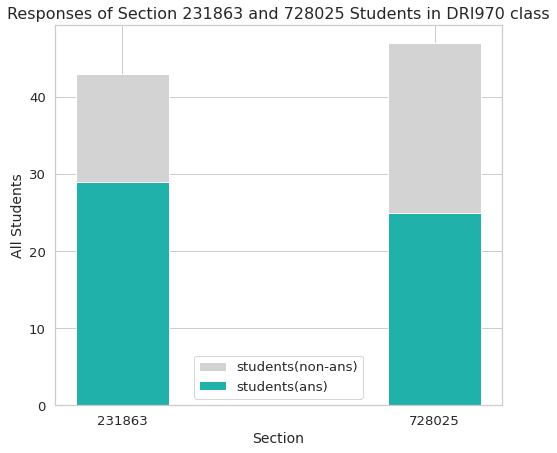

In [ ]:
# ดึงข้อมูลจาก DataFrame โดยการเลือก link ที่ต้องการ
df3 = df[(df['link'] == 3) | (df['link'] == 25)]

sec_list = []                                                   #สร้าง list ชื่อ sec_list      สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดในแต่ละ classroom
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list  สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ตอบแบบประเมินในแต่ละ classroom
sec_bar_chart(df3)                                              #ใช้ฟังก์ชัน sem_bar_chart เพื่อเก็บข้อมูลของ df3

x_labels = sec_list                                             #ฝากค่า sec_list      ไว้ที่ตัวแปร x_labels
all_stu = students_list                                         #ฝากค่า students_list ไว้ที่ตัวแปร all_stu
stu_ans = stu_ans_list                                          #ฝากค่า stu_ans_list  ไว้ที่ตัวแปร stu_ans
stu_non_ans = []                                                #สร้าง list ชื่อ stu_non_ans   สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ไม่ได้ตอบแบบประเมินในแต่ละ classroom
for i in range(len(all_stu)):                                   #ลูป i ตามจำนวนนักเรียนทั้งหมด
  difference = all_stu[i] - stu_ans[i]                          #ให้ข้อมูลใน list all_stu กับ stu_ans ใน index เดียวกันที่ i มาลบกัน และฝากค่าไว้ที่ตัวแปร
  stu_non_ans.append(difference)                                #เพิ่มข้อมูล difference เข้าลิสต์ stu_non_ans

width = 0.3                                                     #กำหนดขนาดความกว้างของ bar

fig, ax = plt.subplots()                                        #ใช้ฟังก์ชัน subplots เพื่อสร้างกราฟ
fig.set_size_inches(8, 7)                                       #กำหนดขนาดของขอบเขตกราฟ

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาดแท่ง สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
ax.bar(x_labels, stu_non_ans, width, color='lightgrey', bottom=stu_ans, label='students(non-ans)')
ax.bar(x_labels, stu_ans, width, color='lightseagreen', label='students(ans)')

#กำหนดหัวข้อกราฟ ชื่อแกน x และ แกน y รวมถึงขนาดตัวอักษร
ax.set_title('Responses of Section 231863 and 728025 Students in DRI970 class', fontsize = 16)
ax.set_ylabel('All Students', fontsize= 14)
ax.set_xlabel('Section', fontsize = 14)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
ax.legend()
plt.show()

> สรุป: ในรายวิชา DRI970 ในภาคการศึกษาที่ 1/2563  SEC231863 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 43 คน และตอบแบบประเมิน 29 คน และSEC728025 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 47 คน และตอบแบบประเมิน 25 คน

> Pie chart แสดงร้อยละของระดับการประเมินในส่วนที่ 2 คำถามของคณะ/หน่วยงาน เกี่ยวกับการเรียนการสอน ของ SEC231863 และ SEC728025 ของรายวิชา DRI970 ในภาคการศึกษาที่ 1/2563

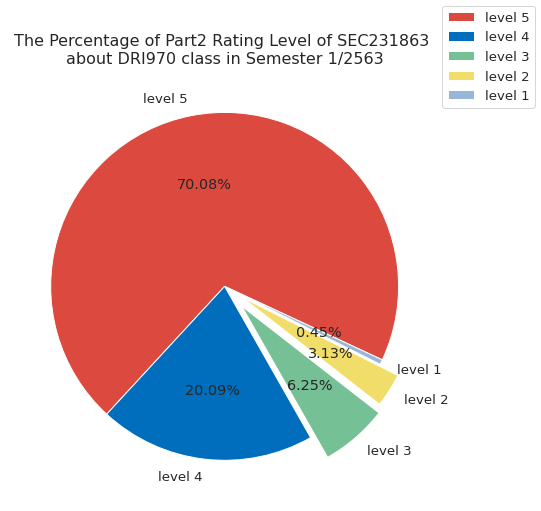

In [ ]:
list_part2 = []                                                 #สร้าง list ชื่อ list_part2 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 2
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part2(3)                                       #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 3

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part2, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 335, explode = [0,0,0.15,0.12,0])

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part2 Rating Level of SEC231863 \nabout DRI970 class in Semester 1/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

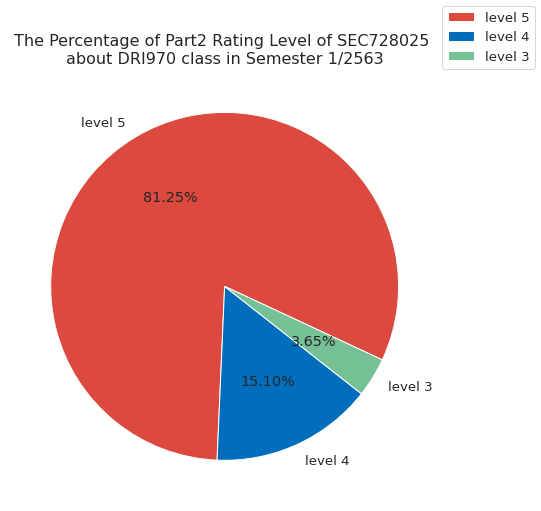

In [ ]:
list_part2 = []                                                 #สร้าง list ชื่อ list_part2 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 2
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part2(25)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 25

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part2, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 335)
ax.set_title('The Percentage of Part2 Rating Level of SEC728025 \nabout DRI970 class in Semester 1/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

> สรุป: จะเห็นได้ว่าในส่วนที่ 2 คำถามของคณะ/หน่วยงาน เกี่ยวกับการเรียนการสอน ของ SEC231863 และ SEC728025 ของรายวิชา DRI970 ในภาคการศึกษาที่ 1/2563 มีนักศึกษาที่ประเมินในระดับที่ 5 เป็นส่วนใหญ่ จากนักศึกษาทั้งหมดที่ตอบแบบประเมินทั้งหมด ดังนั้นผู้สอนยังคงรักษาระดับคุณภาพการสอนได้



---



## **Subject: RMW014 of SEC556574**

> ### การประเมินในส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ ของนักศึกษา SEC556574 ที่ลงทะเบียนเรียนวิชา RMW014 ในภาคการศึกษาที่ 2/2561 และ 1/2562 ในช่วงเรียนปกติ

> Stacked bar chart แสดงการเปรียบเทียบของจำนวนนักศึกษาของ SEC556574 ในรายวิชา RMW014 ที่ตอบและไม่ตอบแบบประเมินในภาคการศึกษาที่ 2/2561 และ 1/2562


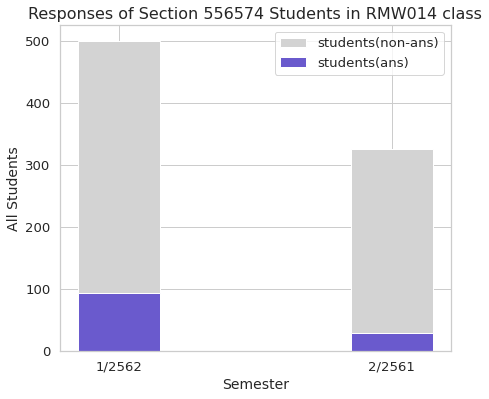

In [ ]:
# ดึงข้อมูลจาก DataFrame โดยการเลือก link ที่ต้องการ
df4 = df[(df['link'] == 7) | (df['link'] == 18)]

sem_list = []                                                   #สร้าง list ชื่อ sem_list      สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดในแต่ละ classroom
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list  สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ตอบแบบประเมินในแต่ละ classroom
sem_bar_chart(df4)                                              #ใช้ฟังก์ชัน sem_bar_chart เพื่อเก็บข้อมูลของ df4

x_labels = sem_list                                             #ฝากค่า sem_list      ไว้ที่ตัวแปร x_labels
all_stu = students_list                                         #ฝากค่า students_list ไว้ที่ตัวแปร all_stu
stu_ans = stu_ans_list                                          #ฝากค่า stu_ans_list  ไว้ที่ตัวแปร stu_ans
stu_non_ans = []                                                #สร้าง list ชื่อ stu_non_ans   สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ไม่ได้ตอบแบบประเมินในแต่ละ classroom
for i in range(len(all_stu)):                                   #ลูป i ตามจำนวนนักเรียนทั้งหมด
  difference = all_stu[i] - stu_ans[i]                          #ให้ข้อมูลใน list all_stu กับ stu_ans ใน index เดียวกันที่ i มาลบกัน และฝากค่าไว้ที่ตัวแปร
  stu_non_ans.append(difference)                                #เพิ่มข้อมูล difference เข้าลิสต์ stu_non_ans

width = 0.3                                                     #กำหนดขนาดความกว้างของ bar

fig, ax = plt.subplots()                                        #ใช้ฟังก์ชัน subplots เพื่อสร้างกราฟ
fig.set_size_inches(7, 6)                                       #กำหนดขนาดของขอบเขตกราฟ

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาดแท่ง สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
ax.bar(x_labels, stu_non_ans, width, color='lightgrey', bottom=stu_ans, label='students(non-ans)')
ax.bar(x_labels, stu_ans, width, color='slateblue', label='students(ans)')

#กำหนดหัวข้อกราฟ ชื่อแกน x และ แกน y รวมถึงขนาดตัวอักษร
ax.set_title('Responses of Section 556574 Students in RMW014 class', fontsize = 16)
ax.set_ylabel('All Students', fontsize= 14)
ax.set_xlabel('Semester', fontsize = 14)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
ax.legend()
plt.show()

> สรุป: SEC556574 ในรายวิชา RMW014 ในภาคการศึกษาที่ 1/2562 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 501 คน และตอบแบบประเมิน 94 คน และในภาคการศึกษาที่ 2/2561 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 326 คน และตอบแบบประเมิน 30 คน

> Pie chart แสดงร้อยละของระดับการประเมินในส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้เกี่ยวกับการเรียนการสอนของ SEC556574 ในรายวิชา RMW014 ในภาคการศึกษาที่ 2/2561 และ 1/2562

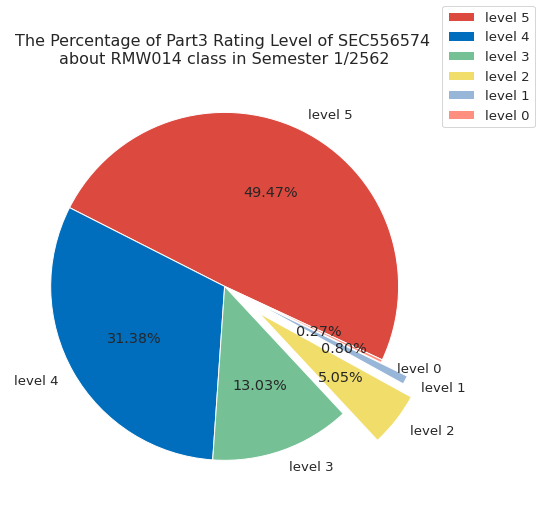

In [ ]:
list_part3 = []                                                 #สร้าง list ชื่อ list_part3 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 3
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part3(7)                                       #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 7

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part3, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 335, explode = [0,0,0,0.25,0.17,0])

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part3 Rating Level of SEC556574 \nabout RMW014 class in Semester 1/2562', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

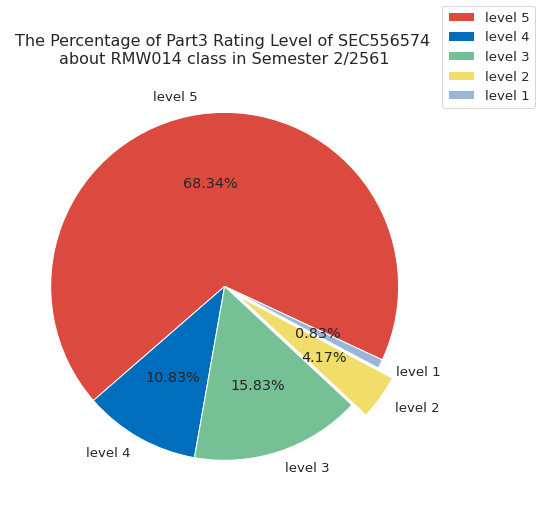

In [ ]:
list_part3 = []                                                 #สร้าง list ชื่อ list_part3 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 3
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part3(18)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 18

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part3, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 335, explode = [0,0,0,0.1,0])

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part3 Rating Level of SEC556574 \nabout RMW014 class in Semester 2/2561', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

> สรุป: จะเห็นได้ว่าในส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้เกี่ยวกับการเรียนการสอนของ SEC556574 ในรายวิชา RMW014 ในภาคการศึกษาที่ 2/2561 และ 1/2562 มีนักศึกษาที่ประเมินในระดับที่ 5 เป็นส่วนใหญ่ จากนักศึกษาทั้งหมดที่ตอบแบบประเมินทั้งหมด ดังนั้นสภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ยังคงเหมาะสมสำหรับการเรียนการสอน



---



## **Subject: FGL497 in Semester 2/2563**

> ### การประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย ของนักศึกษาที่ลงทะเบียนเรียนวิชา FGL497 ในภาคการศึกษาที่ 2/2563 ในช่วง COVID-19
> พบว่ามีนักศึกษา SEC728025 SEC231863 และ SEC696574 ที่ลงทะเบียนเรียนวิชา FGL497 ในช่วง Covid-19 ในภาคการศึกษาที่ 2/2563


> Stacked bar chart แสดงการเปรียบเทียบของจำนวนนักศึกษาของ SEC728025 SEC231863 และ SEC696574 ในรายวิชา FGL497 ที่ตอบและไม่ตอบแบบประเมินในภาคการศึกษาที่ 2/2563

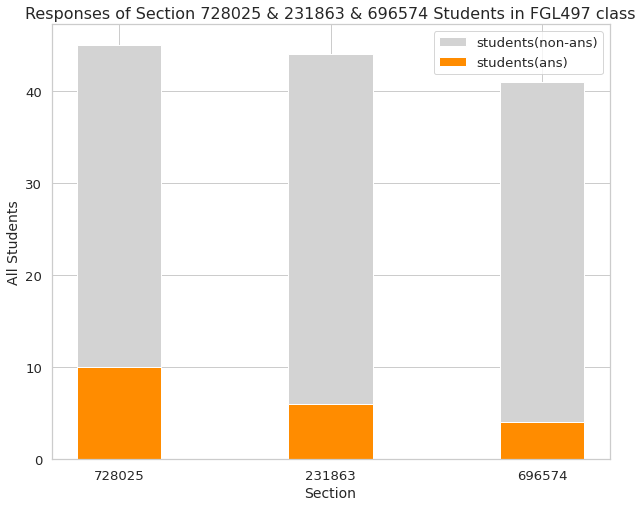

In [ ]:
# ดึงข้อมูลจาก DataFrame โดยการเลือก link ที่ต้องการ
df5 = df[(df['link'] == 2) | (df['link'] == 12) | (df['link'] == 16)]

sec_list = []                                                   #สร้าง list ชื่อ sec_list      สำหรับเก็บข้อมูลของภาคการศึกษา
students_list = []                                              #สร้าง list ชื่อ students_list สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดในแต่ละ classroom
stu_ans_list = []                                               #สร้าง list ชื่อ stu_ans_list  สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ตอบแบบประเมินในแต่ละ classroom
sec_bar_chart(df5)                                              #ใช้ฟังก์ชัน sec_bar_chart เพื่อเก็บข้อมูลของ df5

x_labels = sec_list                                             #ฝากค่า sec_list      ไว้ที่ตัวแปร x_labels
all_stu = students_list                                         #ฝากค่า students_list ไว้ที่ตัวแปร all_stu
stu_ans = stu_ans_list                                          #ฝากค่า stu_ans_list  ไว้ที่ตัวแปร stu_ans
stu_non_ans = []                                                #สร้าง list ชื่อ stu_non_ans   สำหรับเก็บข้อมูลจำนวนนักเรียนทั้งหมดที่ไม่ได้ตอบแบบประเมินในแต่ละ classroom
for i in range(len(all_stu)):                                   #ลูป i ตามจำนวนนักเรียนทั้งหมด
  difference = all_stu[i] - stu_ans[i]                          #ให้ข้อมูลใน list all_stu กับ stu_ans ใน index เดียวกันที่ i มาลบกัน และฝากค่าไว้ที่ตัวแปร
  stu_non_ans.append(difference)                                #เพิ่มข้อมูล difference เข้าลิสต์ stu_non_ans

width = 0.4                                                     #กำหนดขนาดความกว้างของ bar

fig, ax = plt.subplots()                                        #ใช้ฟังก์ชัน subplots เพื่อสร้างกราฟ
fig.set_size_inches(10, 8)                                      #กำหนดขนาดของขอบเขตกราฟ

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาดแท่ง สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
ax.bar(x_labels, stu_non_ans, width, color='lightgrey', bottom=stu_ans, label='students(non-ans)')
ax.bar(x_labels, stu_ans, width, color='darkorange', label='students(ans)')

#กำหนดหัวข้อกราฟ ชื่อแกน x และ แกน y รวมถึงขนาดตัวอักษร
ax.set_title('Responses of Section 728025 & 231863 & 696574 Students in FGL497 class', fontsize = 16)
ax.set_ylabel('All Students', fontsize= 14)
ax.set_xlabel('Section', fontsize = 14)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
ax.legend()
plt.show()

> สรุป: ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2563  SEC728025 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 45 คน และตอบแบบประเมิน 10 คน SEC231863 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 66 คน และตอบแบบประเมิน 41 คน และ SEC696574 มีนักศึกษาลงทะเบียนเรียนทั้งหมด 41 คน และตอบแบบประเมิน 4 คน


> Pie chart แสดงร้อยละของระดับการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย เกี่ยวกับการเรียนการสอนในช่วง COVID-19 ของ SEC728025 SEC231863 และ SEC696574 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2563

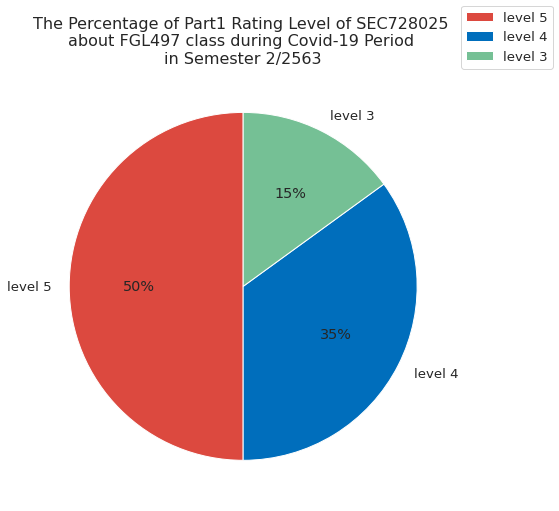

In [ ]:
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(2)                                       #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 2

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.0f%%', colors = pie_colors, startangle = 90)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC728025 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

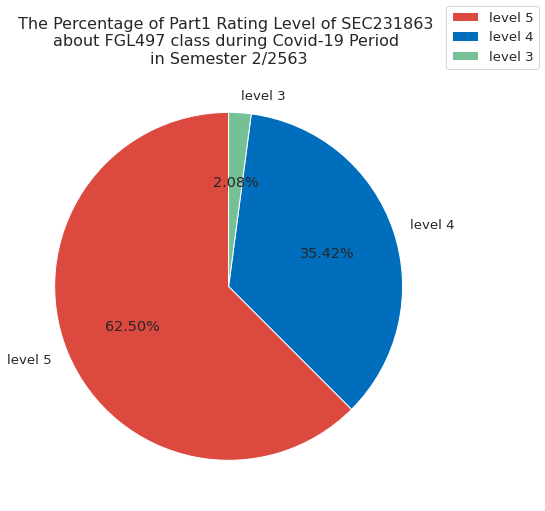

In [ ]:
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(12)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 12

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 90)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC231863 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

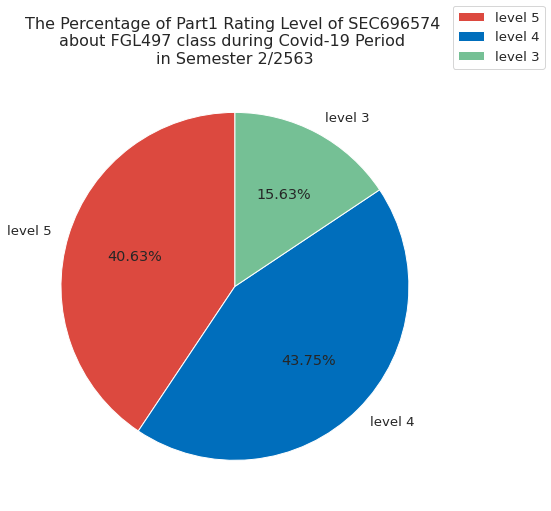

In [ ]:
list_part1 = []                                                 #สร้าง list ชื่อ list_part1 สำหรับเก็บข้อมูลคะแนนการประเมินของข้อคำถามส่วนที่ 1
new_labels = []                                                 #สร้าง list ชื่อ new_labels สำหรับเก็บข้อมูลของ labels ใหม่ ที่จะใช้อธิบายใน Pie chart
pie_chart_rating_part1(16)                                      #ใช้ฟังก์ชัน pie_chart_rating_part1 กับ link ที่ 16

#กำหนดเงื่อนไขต่าง ๆ ของข้อมูลที่จะใส่ลงในกราฟ ทั้งขนาด สี รวมถึง label เพื่อบ่งบอกถึงข้อมูลนั้น ๆ
pie_colors = ['#DC493F','#006EBC','#75C095','#F1DD6A','#98B6D7','#FF8F7F']
fig, ax = plt.subplots(figsize=(9,8))
ax.pie(list_part1, labels=new_labels, autopct = '%.2f%%', colors = pie_colors, startangle = 90)

#กำหนดหัวข้อกราฟรวมถึงขนาดตัวอักษร
ax.set_title('The Percentage of Part1 Rating Level of SEC696574 \nabout FGL497 class during Covid-19 Period \nin Semester 2/2563', fontsize = 16)

#ฟังก์ชันแสดงกล่องข้อความของข้อมูลและเรียกแสดงกราฟ
fig.legend()
plt.show()

> สรุป: จะเห็นได้ว่าการประเมินในส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย เกี่ยวกับการเรียนการสอนในช่วง COVID-19 ของ SEC728025 SEC231863 และ SEC696574 ในรายวิชา FGL497 ในภาคการศึกษาที่ 2/2563 มีนักศึกษาที่ประเมินในระดับที่ 4 และระดับที่ 5 เป็นส่วนใหญ่ จากนักศึกษาทั้งหมดที่ตอบแบบประเมินทั้งหมด ดังนั้นผู้สอนยังคงรักษาระดับคุณภาพการสอนได้



---
# **THANK YOU!**
